In [2]:
# Dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#import IMDB movie data - Title Basic, Name Basic, Title crew and Title Ratings
    #https://www.kaggle.com/tinoswe/split-python-dataframe
title_basics = pd.read_csv('../data/title.basics.tsv',delimiter='\t',encoding='utf-8-sig',low_memory=False)

In [4]:
#confirm columns
print(list(title_basics.columns.values)) 

['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']


In [5]:
#print Title basic dataframe
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
#filter dataframe to exclude tv data
title_basics_filtered = title_basics[title_basics['titleType']!="tvEpisode"]
title_basics_filtered.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
#confirm exclusion
title_basics_filtered.count

<bound method DataFrame.count of             tconst titleType                    primaryTitle  \
0        tt0000001     short                      Carmencita   
1        tt0000002     short          Le clown et ses chiens   
2        tt0000003     short                  Pauvre Pierrot   
3        tt0000004     short                     Un bon bock   
4        tt0000005     short                Blacksmith Scene   
...            ...       ...                             ...   
6751841  tt9916734     video                    Manca: Peleo   
6751850  tt9916754     movie  Chico Albuquerque - Revelações   
6751851  tt9916756     short        Pretty Pretty Black Girl   
6751855  tt9916764     short                              38   
6751898  tt9916856     short                        The Wind   

                          originalTitle  isAdult startYear endYear  \
0                            Carmencita        0      1894      \N   
1                Le clown et ses chiens        0      1892

In [8]:
title_basics_filtered[['Genre1','Genre2','Genre3']] = title_basics_filtered.genres.str.split(",",expand=True,)

C:\Users\alerosa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
#add a column with primary genre
#https://cmdlinetips.com/2018/11/how-to-split-a-text-column-in-pandas/

title_basics_filtered[['GenrePrimary','Genre2','Genre3']] = title_basics_filtered.genres.str.split(",",expand=True,)

In [10]:
title_basics_filtered.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Genre1,Genre2,Genre3,GenrePrimary
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",Documentary,Short,None,Documentary
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",Animation,Short,None,Animation
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",Animation,Comedy,Romance,Animation
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",Animation,Short,None,Animation
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",Comedy,Short,None,Comedy


In [11]:
#add a column with primary genre
#https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

#title_basics_filtered["genresPrimary"]= title_basics_filtered["genres"].str.split(",", n = 1, expand = True)
#title_basics_filtered

In [12]:
#import title ratings
title_ratings = pd.read_csv('../data/title.ratings.tsv',delimiter='\t',encoding='utf-8-sig')
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1609
1,tt0000002,6.0,197
2,tt0000003,6.5,1287
3,tt0000004,6.1,121
4,tt0000005,6.1,2052


In [13]:
#import title crew
title_crew = pd.read_csv('../data/title.crew.tsv',delimiter='\t',encoding='utf-8-sig')
title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [14]:
#import name basics
name_basics = pd.read_csv('../data/name.basics.tsv',delimiter='\t',encoding='utf-8-sig')
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0043044,tt0050419,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0049189,tt0054452,tt0057345,tt0059956"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0072562,tt0078723,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0060827,tt0050986"


In [15]:
#Merge basic df and rating df
title_ratings_merged = title_basics_filtered.set_index('tconst').join(title_ratings.set_index('tconst'))

#save as csv
title_ratings_merged.to_csv('../data/title_merged.csv', index=True)

title_ratings_merged.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Genre1,Genre2,Genre3,GenrePrimary,averageRating,numVotes
tconst,,,,,,,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",Documentary,Short,None,Documentary,5.6,1609.0
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",Animation,Short,None,Animation,6.0,197.0
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",Animation,Comedy,Romance,Animation,6.5,1287.0
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",Animation,Short,None,Animation,6.1,121.0
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",Comedy,Short,None,Comedy,6.1,2052.0


In [16]:
#merge crew data with basic title
crew_merged = title_crew.set_index('tconst').join(title_basics.set_index('tconst'))
crew_merged.head()

,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,,,
tt0000001,nm0005690,\N,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
tt0000002,nm0721526,\N,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
tt0000003,nm0721526,\N,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
tt0000004,nm0721526,\N,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
tt0000005,nm0005690,\N,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [17]:
#merge name basics df and title crew
crew_merged_final = crew_merged.set_index('directors').join(name_basics.set_index('nconst')).reset_index()

#save as csv
crew_merged_final.to_csv('../data/crew_merged.csv', index=True)

crew_merged_final.head()

,index,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,\N,\N,short,Barnet Horse Fair,Barnet Horse Fair,0,1896,\N,\N,Short,NaN,NaN,NaN,NaN,NaN
1,\N,\N,short,Pompiers à Lyon,Pompiers à Lyon,0,1896,\N,1,"Documentary,Short",NaN,NaN,NaN,NaN,NaN
2,\N,\N,short,The Terrible Railway Accident,The Terrible Railway Accident,0,1896,\N,\N,Short,NaN,NaN,NaN,NaN,NaN
3,\N,\N,short,The Wandering Negro Minstrels,The Wandering Negro Minstrels,0,1896,\N,\N,"Music,Short",NaN,NaN,NaN,NaN,NaN
4,\N,\N,short,Brittania,Brittania,0,1898,\N,\N,Short,NaN,NaN,NaN,NaN,NaN


In [18]:
#import box office data from BoxOfficeMojo
box_office = pd.read_csv('../data/boxoffice.csv')
box_office.head()

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avatar,Fox,760507625,2009
2,3,Black Panther,BV,700059566,2018
3,4,Avengers: Infinity War,BV,678681680,2018
4,5,Titanic,Par.,659363944,1997


In [19]:
#groupby box office data
office_group = pd.DataFrame(box_office.groupby(["year"])["lifetime_gross"].sum().reset_index())
office_group.head()

,year,lifetime_gross
0,1921,9183673
1,1926,814000
2,1927,1236166
3,1931,19181
4,1936,163577


In [20]:
#create separte box office dataframes to plot
office_group_2 = pd.DataFrame(box_office.groupby(["year"])["title"].count().reset_index())
box_plot = office_group.set_index('year').join(office_group_2.set_index('year'))
box_plot.head()

,lifetime_gross,title
year,,
1921,9183673,1
1926,814000,1
1927,1236166,1
1931,19181,1
1936,163577,1


In [21]:
#calculate avg gross $ per movie
box_plot['Avg. lifetime gross'] = box_plot['lifetime_gross']/box_plot['title']

In [22]:
#reset index to get year in column
box_plot.reset_index()

,year,lifetime_gross,title,Avg. lifetime gross
0,1921,9183673,1,9.183673e+06
1,1926,814000,1,8.140000e+05
2,1927,1236166,1,1.236166e+06
3,1931,19181,1,1.918100e+04
4,1936,163577,1,1.635770e+05
...,...,...,...,...
77,2014,10428436814,698,1.494045e+07
78,2015,11100189108,701,1.583479e+07
79,2016,11366811244,715,1.589764e+07
80,2017,11115806818,717,1.550322e+07


In [23]:
#save as csv
box_plot.to_csv('../data/box_update.csv', index=True)

In [24]:
#import TMDB movies and credits
tmdb_5000_movies = pd.read_csv('../data/tmdb_5000_movies.csv')
tmdb_5000_credits = pd.read_csv('../data/tmdb_5000_credits.csv')

In [25]:
tmdb_5000_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,385907,"[{""id"": 18, ""name"": ""Drama""}]",NaN,3059,"[{""id"": 279, ""name"": ""usa""}, {""id"": 2487, ""nam...",en,Intolerance,"The story of a poor young woman, separated by ...",3.232447,"[{""name"": ""Triangle Film Corporation"", ""id"": 1...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",9/4/1916,8394751,197.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Cruel Hand of Intolerance,Intolerance,7.4,60
1,245000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,3060,"[{""id"": 2504, ""name"": ""world war i""}, {""id"": 1...",en,The Big Parade,The story of an idle rich boy who joins the US...,0.785744,"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11/5/1925,22000000,151.0,[],Released,NaN,The Big Parade,7.0,21
2,92620000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,19,"[{""id"": 312, ""name"": ""man vs machine""}, {""id"":...",de,Metropolis,In a futuristic city sharply divided between t...,32.351527,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}]",1/10/1927,650422,153.0,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",Released,There can be no understanding between the hand...,Metropolis,8.0,657


In [26]:
tmdb_5000_credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [27]:
#merge two dataframes
tmdb_merged = tmdb_5000_movies.set_index('original_title').join(tmdb_5000_credits.set_index('title')).reset_index()

tmdb_merged.to_csv('../data/tmdb_merged.csv', index=True)

tmdb_merged.head(3)

,index,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,#Horror,1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",http://www.hashtaghorror.com/,301325,[],de,"Inspired by actual events, a group of 12 year ...",2.815228,"[{""name"": ""AST Studios"", ""id"": 75277}, {""name""...",...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Death is trending.,#Horror,3.3,52,301325.0,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{""credit_id"": ""545bbac70e0a261fb6002329"", ""de..."
1,$upercapitalist,0,"[{""id"": 53, ""name"": ""Thriller""}]",http://supercapitalist.net/,119458,[],en,A maverick New York hedge fund trader with unc...,0.174311,[],...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Money for Life,Supercapitalist,3.5,2,NaN,NaN,NaN
2,(500) Days of Summer,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...",...,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It was almost like falling in love.,(500) Days of Summer,7.2,2904,19913.0,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{""credit_id"": ""52fe47f99251416c750abaa5"", ""de..."


In [28]:
# import Movie Genre Poster dataset
#https://www.kaggle.com/neha1703/movie-genre-from-its-poster/discussion/35485

movie_genre = pd.read_csv('../data/MovieGenre.csv',encoding='ISO-8859-1')  

In [29]:
movie_genre.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [30]:
movie_genre[['GenrePrimary','Genre2','Genre3']] = movie_genre.Genre.str.split("|",expand=True,)
movie_genre.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,GenrePrimary,Genre2,Genre3
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,Animation,Adventure,Comedy
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,Action,Adventure,Family
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,Comedy,Romance,None
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,Comedy,Drama,Romance
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,Comedy,Family,Romance


In [31]:
#https://community.plotly.com/t/solved-update-to-plotly-4-0-0-broke-application/26526
#https://plotly.com/python/ipython-notebook-tutorial/#installation
#import chart_studio.plotly as py
#from plotly.offline import iplot
#import plotly.graph_objects as go

In [32]:
#data = [go.Bar(x=box_df.year,
            #y=box_df.lifetime_gross)]

#py.iplot(data, filename='jupyter-basic_bar')

In [33]:
tmdb_merged.reset_index()

,level_0,index,budget,genres,homepage,id,keywords,original_language,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,0,#Horror,1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",http://www.hashtaghorror.com/,301325,[],de,"Inspired by actual events, a group of 12 year ...",2.815228,...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Death is trending.,#Horror,3.3,52,301325.0,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{""credit_id"": ""545bbac70e0a261fb6002329"", ""de..."
1,1,$upercapitalist,0,"[{""id"": 53, ""name"": ""Thriller""}]",http://supercapitalist.net/,119458,[],en,A maverick New York hedge fund trader with unc...,0.174311,...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Money for Life,Supercapitalist,3.5,2,NaN,NaN,NaN
2,2,(500) Days of Summer,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,...,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It was almost like falling in love.,(500) Days of Summer,7.2,2904,19913.0,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{""credit_id"": ""52fe47f99251416c750abaa5"", ""de..."
3,3,...E tu vivrai nel terrore! L'aldilà,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,19204,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 1706, ""n...",it,A young woman inherits an old hotel in Louisia...,8.022122,...,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The seven dreaded gateways to Hell are conceal...,The Beyond,6.6,117,NaN,NaN,NaN
4,4,10 Cloverfield Lane,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,"After a car accident, Michelle awakens to find...",53.698683,...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Monsters come in many forms.,10 Cloverfield Lane,6.8,2468,333371.0,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{""credit_id"": ""57627624c3a3680682000872"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4802,4802,인천상륙작전,0,"[{""id"": 36, ""name"": ""History""}, {""id"": 18, ""na...",NaN,407887,"[{""id"": 10586, ""name"": ""korea""}, {""id"": 229851...",ko,A squad of soldiers fight in the Korean War's ...,6.116436,...,110.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Odds Were 5000 to 1 … One was all They Nee...,Operation Chromite,5.8,29,NaN,NaN,NaN
4803,4803,"좋은 놈, 나쁜 놈, 이상한 놈",10000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,15067,"[{""id"": 75, ""name"": ""gunslinger""}, {""id"": 1419...",ko,The story of three Korean outlaws in 1930s Man...,11.847324,...,130.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,A Fistful of Fun!,"The Good, The Bad, The Weird",7.1,193,NaN,NaN,NaN
4804,4804,친절한 금자씨,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",http://www.lady-vengeance.de/,4550,"[{""id"": 10183, ""name"": ""independent film""}]",ko,After a 13-year imprisonment for the kidnap an...,17.074843,...,115.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,All she wanted was a peaceful life... they did...,Sympathy for Lady Vengeance,7.4,356,NaN,NaN,NaN
4805,4805,태극기 휘날리며,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,11658,"[{""id"": 41586, ""name"": ""archaeologist""}, {""id""...",ko,"In 1950, in South Korea, shoe-shiner Jin-tae L...",9.572705,...,140.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,NaN,Tae Guk Gi: The Brotherhood of War,7.4,133,NaN,NaN,NaN


In [34]:
tmdb_merged.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [35]:
tmdb_merged.dtypes

index                    object
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
movie_id                float64
cast                     object
crew                     object
dtype: object

In [36]:
#change both start/end times to 'datetime' format

tmdb_5000_movies['releaseDate'] = pd.to_datetime(tmdb_5000_movies['release_date'])
tmdb_5000_movies.releaseDate.dt.strftime('%d-%m-%y')


0       04-09-16
1       05-11-25
2       10-01-27
3       30-01-29
4       08-02-29
          ...   
4797    09-09-16
4798    09-09-16
4799    16-09-16
4800    02-10-16
4801    03-02-17
Name: releaseDate, Length: 4802, dtype: object

In [37]:
tmdb_5000_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'releaseDate'],
      dtype='object')

In [38]:
tmdb_5000_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,releaseDate
0,385907,"[{""id"": 18, ""name"": ""Drama""}]",NaN,3059,"[{""id"": 279, ""name"": ""usa""}, {""id"": 2487, ""nam...",en,Intolerance,"The story of a poor young woman, separated by ...",3.232447,"[{""name"": ""Triangle Film Corporation"", ""id"": 1...",...,9/4/1916,8394751,197.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Cruel Hand of Intolerance,Intolerance,7.4,60,1916-09-04


In [71]:
tmdb_5000_movies.sort_values(by=['releaseDate'], ascending=True).head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,releaseDate,month
0,385907,"[{""id"": 18, ""name"": ""Drama""}]",NaN,3059,"[{""id"": 279, ""name"": ""usa""}, {""id"": 2487, ""nam...",en,Intolerance,"The story of a poor young woman, separated by ...",3.232447,"[{""name"": ""Triangle Film Corporation"", ""id"": 1...",...,8394751,197.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Cruel Hand of Intolerance,Intolerance,7.4,60,1916-09-04,9
1,245000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,3060,"[{""id"": 2504, ""name"": ""world war i""}, {""id"": 1...",en,The Big Parade,The story of an idle rich boy who joins the US...,0.785744,"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8...",...,22000000,151.0,[],Released,NaN,The Big Parade,7.0,21,1925-11-05,11


In [40]:
tmdb_5000_movies['month'] = tmdb_5000_movies['releaseDate'].dt.month

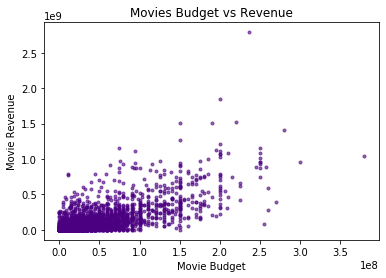

In [41]:
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
x = tmdb_5000_movies['budget']
y = tmdb_5000_movies['revenue']

plt.title('Movies Budget vs Revenue')
plt.xlabel('Movie Budget')
plt.ylabel('Movie Revenue')

plt.scatter(x, y, marker='.', alpha=0.6, color='indigo')

plt.savefig('../static/images/plot1.png')

plt.show()

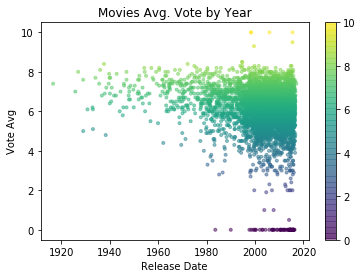

In [67]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

x = tmdb_5000_movies['releaseDate']
y = tmdb_5000_movies['vote_average']
colors = tmdb_5000_movies['vote_average']

plt.title('Movies Avg. Vote by Year')
plt.xlabel('Release Date')
plt.ylabel('Vote Avg')

plt.scatter(x, y,c=colors, marker ='.', alpha=0.5)
plt.colorbar()

plt.savefig('../static/images/plot2.png')

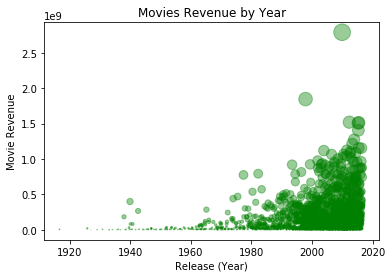

In [43]:
x = tmdb_5000_movies['releaseDate']
y = tmdb_5000_movies['revenue']

size = tmdb_5000_movies['revenue']/10000000

plt.title('Movies Revenue by Year')
plt.xlabel('Release (Year)')
plt.ylabel('Movie Revenue')

plt.scatter(x, y, s=size, alpha=0.4, color='green')

plt.savefig('../static/images/plot3.png')

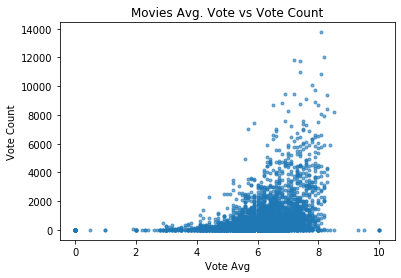

In [44]:
y = tmdb_5000_movies['vote_count']
x = tmdb_5000_movies['vote_average']


plt.title('Movies Avg. Vote vs Vote Count')
plt.ylabel('Vote Count')
plt.xlabel('Vote Avg')

plt.scatter(x, y,alpha=0.6, marker ='.')

plt.savefig('../static/images/plot4.png')

In [51]:
tmdb_5000_movies.mean()

budget          2.905109e+07
id              5.709823e+04
popularity      2.149678e+01
revenue         8.227777e+07
runtime         1.068981e+02
vote_average    6.093440e+00
vote_count      6.903617e+02
month           6.795918e+00
dtype: float64

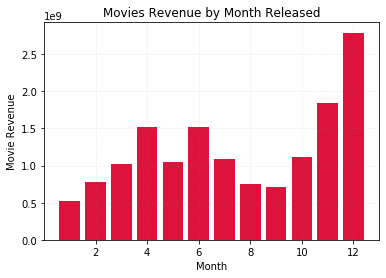

In [45]:
x = tmdb_5000_movies['month']
y = tmdb_5000_movies['revenue']

plt.title('Movies Revenue by Month Released')
plt.xlabel('Month')
plt.ylabel('Movie Revenue')

plt.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

plt.bar(x, y, color='crimson')


plt.show()

In [46]:
title_ratings_merged.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Genre1,Genre2,Genre3,GenrePrimary,averageRating,numVotes
tconst,,,,,,,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",Documentary,Short,None,Documentary,5.6,1609.0
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",Animation,Short,None,Animation,6.0,197.0
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",Animation,Comedy,Romance,Animation,6.5,1287.0
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",Animation,Short,None,Animation,6.1,121.0
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",Comedy,Short,None,Comedy,6.1,2052.0


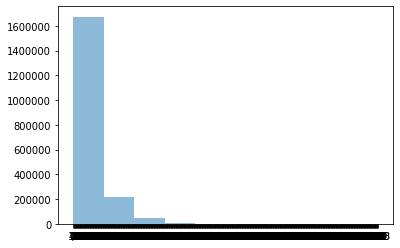

<Figure size 720x864 with 0 Axes>

In [66]:
x = title_ratings_merged['runtimeMinutes']
y = title_ratings_merged['averageRating'].mean()


plt.bar(x, y alpha=0.5)
plt.figure(figsize=(10,12))
plt.show()